BANK CUSTOMER CHURN MODE  PROJECT


IMPORT LIBRARY

In [1]:
import pandas as pd


In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt


In [4]:
import seaborn as sns

IMPORT DATA

In [5]:
df = pd.read_csv('/content/Bank Churn Modelling.csv')

ANALYSE DATA

In [6]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
df.duplicated('CustomerId').sum()

0

In [9]:
df = df.set_index('CustomerId')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


ENCODING

In [11]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [13]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [14]:
df.replace({' Gender':{'Male':0, 'Feamle':1}},inplace=True)

In [15]:
df['Num Of Products'].value_counts()


1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [16]:
df.replace({'Num of Products':{1:0,2:1,3:1,4:1}},inplace= True)


In [17]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [18]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [19]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [20]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

<Axes: >

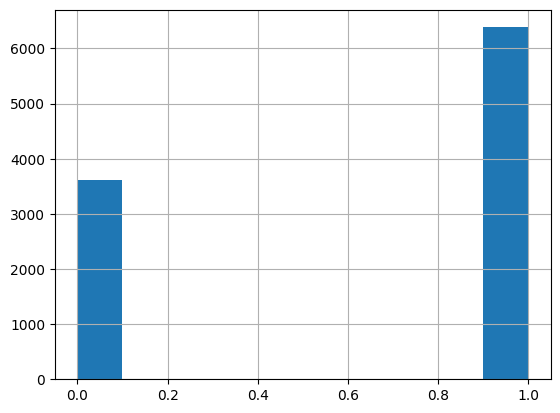

In [21]:
df['Zero Balance'].hist()

In [22]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

DEFINE LABEL AND FEATURES

In [23]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [24]:
x=df.drop(['Surname','Churn'],axis=1)

In [25]:
y=df['Churn']

In [26]:
x.shape,y.shape

((10000, 11), (10000,))

In [27]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

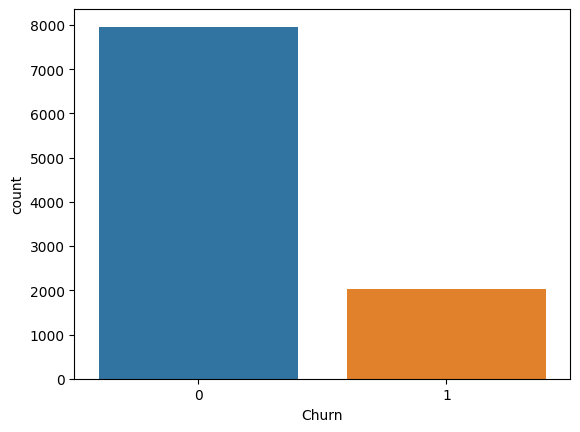

In [28]:
sns.countplot(x ='Churn',data = df);

In [29]:
x.shape,y.shape


((10000, 11), (10000,))

RANDOM UNDER SAMPLING

In [30]:
from imblearn.under_sampling import RandomUnderSampler

In [31]:
rus = RandomUnderSampler(random_state=2529)

In [32]:
x_rus, y_rus = rus.fit_resample(x, y)

In [33]:
x_rus.shape,y_rus.shape, x.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [34]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

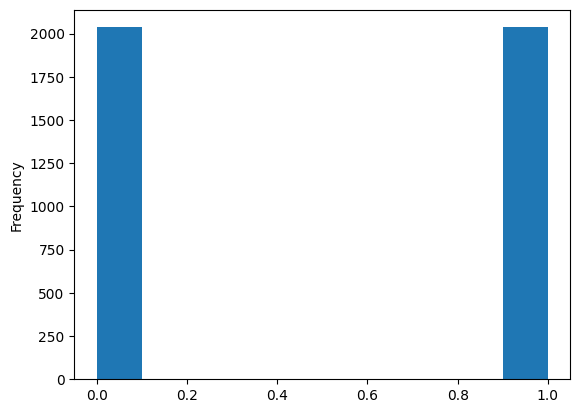

In [35]:
y_rus.plot(kind = 'hist')

RANDOM OVER SAMPLING

In [36]:
from imblearn.over_sampling import RandomOverSampler

In [37]:
ros = RandomOverSampler(random_state=2529)

In [38]:
x_ros, y_ros = ros.fit_resample(x, y)

In [39]:
x_ros.shape,y_ros.shape, x.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [40]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [41]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

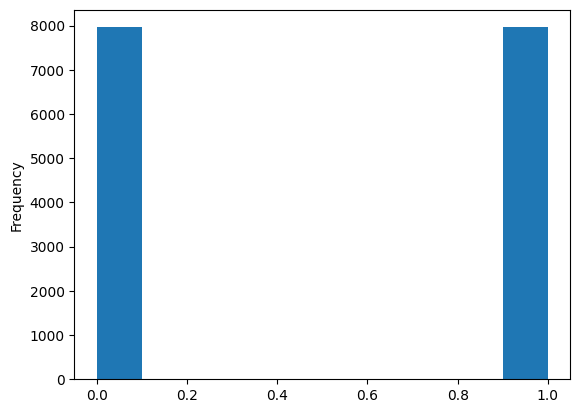

In [42]:
y_ros.plot(kind = 'hist')

TRAIN TEST SPLIT

In [43]:
from sklearn.model_selection import train_test_split

SPLIT ORIGINAL DATA

In [191]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=25)

SPLIT RANDOM UNDER SAMPLE DATA

In [192]:
x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus, y_rus,test_size=0.2 , random_state=25)

SPLIT RANDOM OVER SAMPLE DATA

In [193]:
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros, y_ros,test_size=0.2 , random_state=25)

STANDARDIZE FEATURES

In [194]:
from sklearn.preprocessing import StandardScaler

In [195]:
sc = StandardScaler()

STANDARDIZE ORIGINAL DATA

*   List item
*   List item



In [196]:
x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]= sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [197]:
x_test[['Creditscore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

STANDARDIZE RANDOM UNDER SAMPLE DATA

In [198]:
x_train_rus[['Creditscore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [199]:
x_test_rus[['Creditscore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

STANDARDIZE RANDOM OVER SAMPLE DATA

In [200]:
x_train_ros[['Creditscore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [201]:
x_test_ros[['Creditscore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

SUPPORT VECTOR MACHINE CLASSIFIER

In [253]:
from sklearn.svm import SVC

In [254]:
svc = SVC()

In [255]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']


In [256]:
num_transformer = StandardScaler()

In [257]:
x_train_num = num_transformer.fit_transform(x_train[numerical_features])
x_test_num = num_transformer.transform(x_test[numerical_features])

In [258]:
svc.fit(x_train_num, y_train)

SVC()

In [259]:
y_pred = svc.predict(x_test_num)

MODEL ACCURACY

In [260]:
from sklearn.metrics import confusion_matrix,classification_report

In [261]:
confusion_matrix(y_test,y_pred)

array([[1610,    0],
       [ 390,    0]])

In [262]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1610
           1       0.00      0.00      0.00       390

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


HYPERPARAMETER TUNNING

In [263]:
from sklearn.model_selection import GridSearchCV

In [264]:
param_grid = {'C': [0.1,1, 10],
              'gamma': [1,0.1,0.01],
              'kernel': ['rbf'],
              'class_weight' : ['balanced']}

In [265]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv = 2)
grid.fit(x_train_num,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [266]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=0.1)


In [267]:
grid_predictions = grid.predict(x_test_num)

In [268]:
confusion_matrix(y_test,grid_predictions)

array([[1610,    0],
       [ 390,    0]])

In [269]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1610
           1       0.00      0.00      0.00       390

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MODEL WITH RANDOM UNDER SAMPLING

In [270]:
svc_rus = SVC()

In [273]:
x_test_rus = num_transformer.fit_transform(x_test_rus[numerical_features])

In [276]:
svc_rus.fit(x_train_rus,y_train_rus)

SVC()

In [277]:
y_pred_rus = svc_rus.predict(x_test_rus)

MODEL ACCURACY


In [278]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[301,  93],
       [129, 292]])

In [279]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       394
           1       0.76      0.69      0.72       421

    accuracy                           0.73       815
   macro avg       0.73      0.73      0.73       815
weighted avg       0.73      0.73      0.73       815



HYPERPARAMETER TUNNING

In [280]:
param_grid = {'C':[0.1,1, 10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [283]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv = 2)
grid_rus.fit(x_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [286]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [287]:
grid_predications_rus = grid_rus.predict(x_test_rus)

In [288]:
confusion_matrix(y_test_rus,grid_predications_rus)

array([[298,  96],
       [130, 291]])

In [289]:
print(classification_report(y_test_rus,grid_predications_rus))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       394
           1       0.75      0.69      0.72       421

    accuracy                           0.72       815
   macro avg       0.72      0.72      0.72       815
weighted avg       0.73      0.72      0.72       815



MODEL WITH RANDOM OVER SAMPLING

In [299]:
svc_ros = SVC()

In [302]:
x_train_ros = num_transformer.fit_transform(x_train_ros[numerical_features])

In [303]:
svc_ros.fit(x_train_ros,y_train_ros)

SVC()

In [304]:
y_pred_ros = svc_ros.predict(x_test_ros)

MODEL ACCURACY

In [306]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[1228,  391],
       [ 483, 1084]])

In [308]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1619
           1       0.73      0.69      0.71      1567

    accuracy                           0.73      3186
   macro avg       0.73      0.73      0.73      3186
weighted avg       0.73      0.73      0.73      3186



HYPERPARAMETER TUNNING

In [311]:
param_grid = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight': ['balanced']}

In [313]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_ros.fit(x_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [314]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [315]:
grid_predications_ros = grid_ros.predict(x_test_ros)

In [317]:
confusion_matrix(y_test_ros,grid_predications_ros)

array([[1195,  424],
       [ 289, 1278]])

In [318]:
print(classification_report(y_test_ros,grid_predications_ros))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1619
           1       0.75      0.82      0.78      1567

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



LETS COMPARE

In [319]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1610
           1       0.00      0.00      0.00       390

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [320]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1610
           1       0.00      0.00      0.00       390

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [321]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       394
           1       0.76      0.69      0.72       421

    accuracy                           0.73       815
   macro avg       0.73      0.73      0.73       815
weighted avg       0.73      0.73      0.73       815



In [323]:
print(classification_report(y_test_rus,grid_predications_rus))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       394
           1       0.75      0.69      0.72       421

    accuracy                           0.72       815
   macro avg       0.72      0.72      0.72       815
weighted avg       0.73      0.72      0.72       815



In [327]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1619
           1       0.73      0.69      0.71      1567

    accuracy                           0.73      3186
   macro avg       0.73      0.73      0.73      3186
weighted avg       0.73      0.73      0.73      3186



In [326]:
print(classification_report(y_test_ros,grid_predications_ros))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1619
           1       0.75      0.82      0.78      1567

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186

